In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [10]:
# Step 1: Read Dataset
df = pd.read_csv('training_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path


In [15]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   ID     Name        Date  Value Category  Flag    Text_Field
0   1    Nancy  01-01-2020  47.79        D     1    Test entry
1   2    Nancy  02-01-2020  10.08        B     0    Test entry
2   3  Charlie  03-01-2020  75.18        A     1   Sample text
3   4      Bob  04-01-2020    NaN        B     1  Example data
4   5      Bob  05-01-2020  98.76        D     0   Sample text


In [16]:
# Step 2: Sanity Check of Data
print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values Count:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10000 non-null  int64  
 1   Name        10000 non-null  object 
 2   Date        10000 non-null  object 
 3   Value       9511 non-null   float64
 4   Category    10000 non-null  object 
 5   Flag        10000 non-null  int64  
 6   Text_Field  10000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB
None

Statistical Summary:
                ID        Value          Flag
count  10000.00000  9511.000000  10000.000000
mean    5000.50000    49.950090      0.504600
std     2886.89568    28.830665      0.500004
min        1.00000     0.000000      0.000000
25%     2500.75000    25.185000      0.000000
50%     5000.50000    49.640000      1.000000
75%     7500.25000    75.190000      1.000000
max    10000.00000    99.970000      1.0000


Plotting histograms for numerical features...


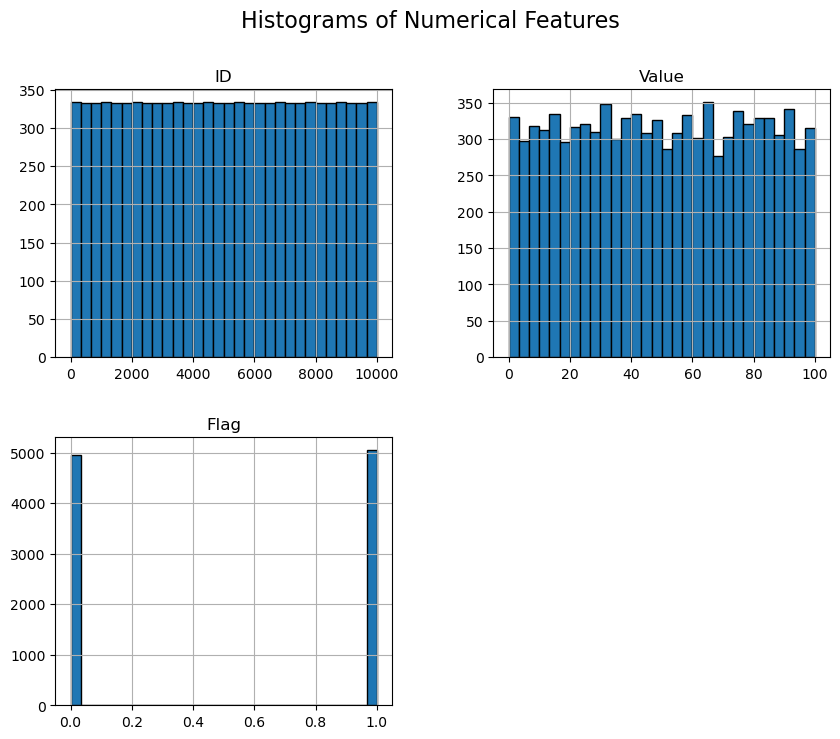

In [17]:
# Step 3: Exploratory Data Analysis
# Histogram for numerical columns
print("\nPlotting histograms for numerical features...")
df.hist(bins=30, figsize=(10, 8), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()



Scatter plots for numerical feature pairs:


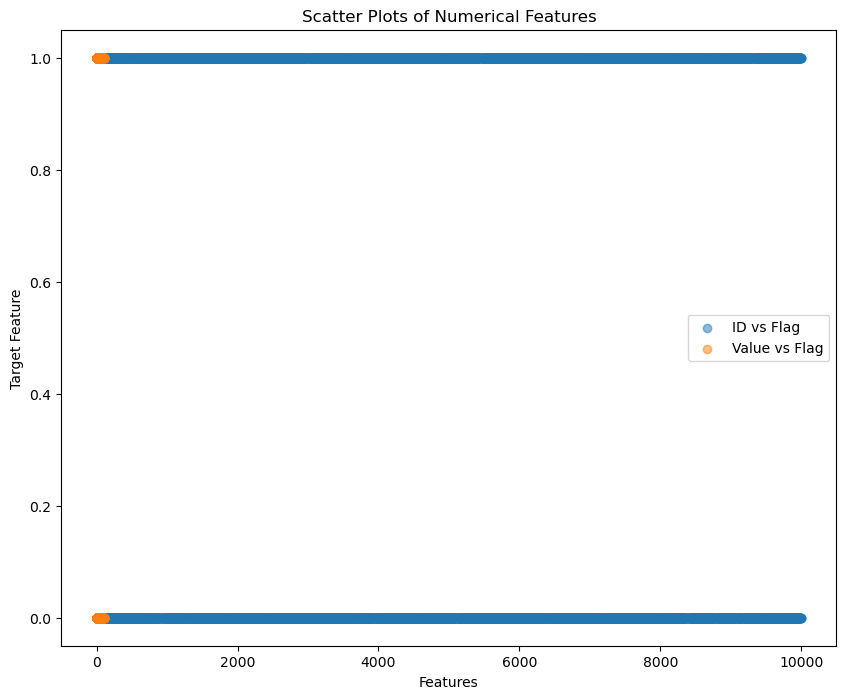

In [18]:
# Scatter plots for correlations between features (pairwise)
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numerical_columns) > 1:
    print("\nScatter plots for numerical feature pairs:")
    plt.figure(figsize=(10, 8))
    for i, column in enumerate(numerical_columns[:-1]):
        plt.scatter(df[column], df[numerical_columns[-1]], alpha=0.5, label=f'{column} vs {numerical_columns[-1]}')
    plt.legend()
    plt.title("Scatter Plots of Numerical Features")
    plt.xlabel("Features")
    plt.ylabel("Target Feature")
    plt.show()

In [21]:
# Correlation matrix (considering only numerical columns)
print("\nCorrelation Matrix:")
numerical_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)


Correlation Matrix:
             ID     Value      Flag
ID     1.000000 -0.013078 -0.005878
Value -0.013078  1.000000 -0.007297
Flag  -0.005878 -0.007297  1.000000


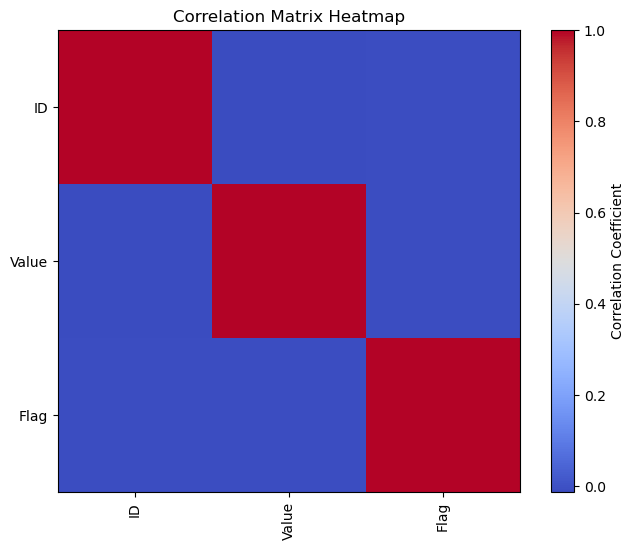

In [22]:
# Optional: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(len(numerical_columns.columns)), numerical_columns.columns, rotation=90)
plt.yticks(range(len(numerical_columns.columns)), numerical_columns.columns)
plt.show()

In [27]:
from sklearn.impute import SimpleImputer

# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Impute missing values in numeric columns using the median strategy
numeric_imputer = SimpleImputer(strategy="median")
numeric_data = pd.DataFrame(numeric_imputer.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Handle missing values in non-numeric columns using the most frequent strategy
non_numeric_imputer = SimpleImputer(strategy="most_frequent")
non_numeric_data = pd.DataFrame(non_numeric_imputer.fit_transform(df[non_numeric_columns]), columns=non_numeric_columns)

# Combine numeric and non-numeric data back into a single DataFrame
df_imputed = pd.concat([numeric_data, non_numeric_data], axis=1)

# Step 4: Missing Values Treatment
# Impute missing values using the median strategy

print("\nMissing Values After Imputation:")
print(df_imputed.isnull().sum())


Missing Values After Imputation:
ID            0
Value         0
Flag          0
Name          0
Date          0
Category      0
Text_Field    0
dtype: int64


In [33]:
# Step 5: Outlier Treatment (IQR Method)

# Filter numeric columns
numeric_cols = df_imputed.select_dtypes(include=['number'])

# Calculate IQR (Interquartile Range)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
df_no_outliers = numeric_cols[
    ~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)
]

# Step 6: Duplicate and Garbage Value Treatment
# Remove duplicates
df_no_duplicates = df_no_outliers.drop_duplicates()

# Handle garbage values (example: negative values in an age column)
if 'age' in df_no_duplicates.columns:
    df_no_duplicates['age'] = df_no_duplicates['age'].apply(lambda x: max(x, 0))

print("\nShape After Removing Duplicates and Handling Garbage Values:")
print(df_no_duplicates.shape)



Shape After Removing Duplicates and Handling Garbage Values:
(10000, 3)


In [35]:
# Step 7: Normalization
# Using StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(
    scaler.fit_transform(df_no_duplicates.select_dtypes(include=[np.number])),
    columns=df_no_duplicates.select_dtypes(include=[np.number]).columns
)

print("\nFirst Few Rows of Normalized Data:")
print(df_normalized.head())



First Few Rows of Normalized Data:
         ID     Value      Flag
0 -1.731878 -0.076290  0.990842
1 -1.731531 -1.417542 -1.009243
2 -1.731185  0.897905  0.990842
3 -1.730838 -0.010490  0.990842
4 -1.730492  1.736588 -1.009243


In [36]:
# Step 8: Encoding Categorical Data
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
categorical_columns = df_no_duplicates.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_no_duplicates[col] = label_encoder.fit_transform(df_no_duplicates[col])

# Or One-Hot Encoding (optional)
df_encoded = pd.get_dummies(df_no_duplicates, drop_first=True)

print("\nEncoded Data Sample:")
print(df_encoded.head())


Encoded Data Sample:
    ID  Value  Flag
0  1.0  47.79   1.0
1  2.0  10.08   0.0
2  3.0  75.18   1.0
3  4.0  49.64   1.0
4  5.0  98.76   0.0


In [42]:
# Step 9: Train-Test Split
X = df_encoded.drop('Value', axis=1)  # Replace 'label' with the actual target column name
y = df_encoded['Value']  # Replace 'label' with the actual target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShapes of Train-Test Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")



Shapes of Train-Test Split:
X_train: (8000, 2), X_test: (2000, 2), y_train: (8000,), y_test: (2000,)
